# Incremental RV and Quality

Using incremental functions split up the spectrum an calculate the precision on section. This provides a look at the change in each precision/quality accross the whole wavelength range easily. Inspired by the plots in Bouchy 200 and Artigau 2018.

Here we show how to use easily use the **incremental_quality** and **incremental_rv** functions.


In [12]:
import matplotlib.pyplot as plt
from eniric.Qcalculator import incremental_rv, incremental_quality
from scripts.phoenix_precision import convolve_and_resample 
from eniric.snr_normalization import snr_constant_band
from eniric.utilities import load_aces_spectrum

In [2]:
# Settings
band = "J"  # analyse this band only (for speed)
snr = 100   # SNR per pixel normalization at center of band.
R = 100000  # Resolution
vsini = 1   # Rotation speed per pixel
smpl=3  # Sampling

In [3]:
wav1, flux1 = load_aces_spectrum([3900, 4.5, 0.0, 0])
wav2, flux2 = load_aces_spectrum([3500, 4.5, 0.0, 0])
wav3, flux3 = load_aces_spectrum([2800, 4.5, 0.0, 0])
wav4, flux4 = load_aces_spectrum([2600, 4.5, 0.0, 0])


In [4]:
# Convolution and resampling
wav1, flux1 = convolve_and_resample(wav1, flux1, vsini=vsini, R=R, band=band, sampling=smpl)
wav2, flux2 = convolve_and_resample(wav2, flux2, vsini=vsini, R=R, band=band, sampling=smpl)
wav3, flux3 = convolve_and_resample(wav3, flux3, vsini=vsini, R=R, band=band, sampling=smpl)
wav4, flux4 = convolve_and_resample(wav4, flux4, vsini=vsini, R=R, band=band, sampling=smpl)

Starting the Rotation convolution for vsini=1.00...


100%|██████████| 80062/80062 [00:03<00:00, 23223.61it/s]


Starting the Resolution convolution...


100%|██████████| 80000/80000 [00:03<00:00, 23045.09it/s]


Starting the Rotation convolution for vsini=1.00...


100%|██████████| 80062/80062 [00:03<00:00, 24167.25it/s]


Starting the Resolution convolution...


100%|██████████| 80000/80000 [00:03<00:00, 25214.88it/s]


Starting the Rotation convolution for vsini=1.00...


100%|██████████| 80062/80062 [00:03<00:00, 24761.29it/s]


Starting the Resolution convolution...


100%|██████████| 80000/80000 [00:03<00:00, 25307.31it/s]


Starting the Rotation convolution for vsini=1.00...


100%|██████████| 80062/80062 [00:03<00:00, 24377.86it/s]


Starting the Resolution convolution...


100%|██████████| 80000/80000 [00:03<00:00, 22257.60it/s]


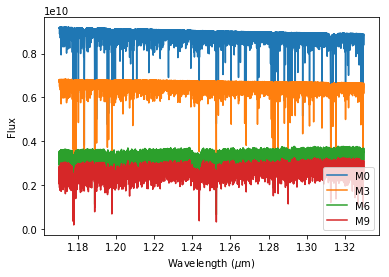

In [5]:
# The 4 spectra examples
plt.plot(wav1, flux1, label="M0")
plt.plot(wav2, flux2, label="M3")
plt.plot(wav3, flux3, label="M6")
plt.plot(wav4, flux4, label="M9")
plt.legend()
plt.ylabel("Flux")
plt.xlabel("Wavelength ($\mu$m)")
plt.show()


In [6]:
# Only dealing with one band so band=band
norm1 = snr_constant_band(wav1, flux1, band=band, snr=snr)
norm2 = snr_constant_band(wav2, flux2, band=band, snr=snr)
norm3 = snr_constant_band(wav3, flux3, band=band, snr=snr)
norm4 = snr_constant_band(wav4, flux4, band=band, snr=snr)

flux1 /= norm1
flux2 /= norm2
flux3 /= norm3
flux4 /= norm4

	Sanity Check: The reference S/N at 1.25 was of 161198.26.
	Sanity Check: The reference S/N at 1.25 was of 137907.57.
	Sanity Check: The reference S/N at 1.25 was of 94333.31.
	Sanity Check: The reference S/N at 1.25 was of 82343.39.


In [7]:
print("This should now be 100! if band == J")
norm4 = snr_constant_band(wav4, flux4, band=band, snr=snr)


This should now be 100! if band == J
	Sanity Check: The reference S/N at 1.25 was of 100.00.


In [8]:
x1, q1 = incremental_quality(wav1, flux1, percent=1)
x2, q2 = incremental_quality(wav2, flux2, percent=1)
x3, q3 = incremental_quality(wav3, flux3, percent=1)
x4, q4 = incremental_quality(wav4, flux4, percent=1)


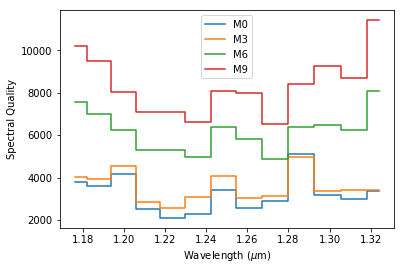

In [9]:
plt.plot(x1, q1, label="M0", drawstyle="steps-mid")
plt.plot(x2, q2, label="M3", drawstyle="steps-mid")
plt.plot(x3, q3, label="M6", drawstyle="steps-mid")
plt.plot(x4, q4, label="M9", drawstyle="steps-mid")
plt.legend()
plt.ylabel("Spectral Quality")
plt.xlabel("Wavelength ($\mu$m)")
plt.show()


In [10]:
xrv1, rv1 = incremental_rv(wav1, flux1, mask=None, percent=1)
xrv2, rv2 = incremental_rv(wav2, flux2, mask=None, percent=1)
xrv3, rv3 = incremental_rv(wav3, flux3, mask=None, percent=1)
xrv4, rv4 = incremental_rv(wav4, flux4, mask=None, percent=1)


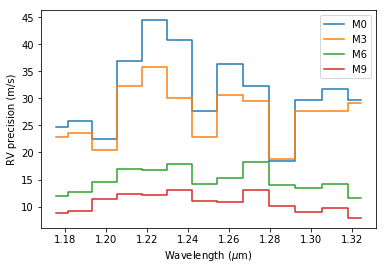

In [11]:
plt.plot(xrv1, rv1, label="M0", drawstyle="steps-mid")
plt.plot(xrv2, rv2, label="M3", drawstyle="steps-mid")
plt.plot(xrv3, rv3, label="M6", drawstyle="steps-mid")
plt.plot(xrv4, rv4, label="M9", drawstyle="steps-mid")
plt.legend()
plt.ylabel("RV precision (m/s)")
plt.xlabel("Wavelength ($\mu$m)")
plt.show()
